## Ploting results from feature compression datasets

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pickle

In [ ]:
rsync -av --remove-source-files --info=progress2 --partial embeddings/HIS7/HIS7_esm1v_650M_mean lcv454@wilkcomp01.ccbb.utexas.edu:/stor/work/Wilke/luiz/DMS_iDCT/embeddings/HIS7/

## Results DMS

In [9]:
base_dir = 'results/lassoCV_DMS/esm2_150M_all'
results = pd.DataFrame()

for f in os.listdir(base_dir):
    parts = f.split('_esm')
    dataset = parts[0]
    sub_parts = parts[1].replace('.csv', '')
    model = f"esm{sub_parts.split('_')[0]}_{sub_parts.split('_')[1]}"
    method = sub_parts.split('_')[2]
    
    file_path = os.path.join(base_dir, f)
    df = pd.read_csv(file_path, index_col=0)
    
    df['Dataset'] = dataset
    df['Model'] = model

    results = pd.concat([results, df])

results

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_method,Dataset
0,esm2_150M,1,0.112793,1.691488,1.996405,0.102670,1.656042,1.965677,0.290026,0.285563,24,rbf1,BF520_env_Bloom2018
1,esm2_150M,2,0.152526,1.645394,1.947709,0.134648,1.636403,1.944731,0.388256,0.336181,46,rbf1,BF520_env_Bloom2018
2,esm2_150M,3,0.102220,1.690724,1.997223,0.108833,1.697843,2.002759,0.279350,0.274983,18,rbf1,BF520_env_Bloom2018
3,esm2_150M,4,0.112482,1.686306,1.988794,0.090167,1.692772,2.012003,0.282585,0.272652,21,rbf1,BF520_env_Bloom2018
4,esm2_150M,5,0.098993,1.684092,1.992737,0.110092,1.740808,2.033340,0.272459,0.297204,17,rbf1,BF520_env_Bloom2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,esm2_150M,1,0.747560,0.152884,0.196845,0.738953,0.154087,0.199617,0.888834,0.883850,554,pca2,PABP_YEAST_Fields2013_doubles
1,esm2_150M,2,0.748257,0.152071,0.196224,0.735414,0.156469,0.202334,0.889467,0.879490,550,pca2,PABP_YEAST_Fields2013_doubles
2,esm2_150M,3,0.747757,0.152400,0.196188,0.736438,0.156020,0.202918,0.888274,0.886296,557,pca2,PABP_YEAST_Fields2013_doubles
3,esm2_150M,4,0.749375,0.151785,0.196373,0.732014,0.156901,0.201239,0.888940,0.882778,554,pca2,PABP_YEAST_Fields2013_doubles


In [10]:
#results.to_csv('results/summary_DMS_all_LassoCV_esm2_150M_all_methods.csv')

### Protein sizes and datasets
P04386	- 881 - "GAL4_YEAST_Shendure2015"    
P31016	- 724 - "DLG4_RAT_Ranganathan2012"    
P04147	- 577 - "PABP_YEAST_Fields2013-singles"    
P60484	- 403 - "PTEN_HUMAN_Fowler2018"    
P11436	- 346 - "AMIE_PSEAE_Whitehead"    
Q56319	- 252 - "TIM_THEMA_b0"    
P0DP23	- 149 - "CALM1_HUMAN_Roth2017"    

## Results DMS

In [31]:
old_names = ['HG_FLU_Bloom2016', 'BLAT_ECOLX_Ostermeier2014',
       'RL401_YEAST_Bolon2014', 'PABP_YEAST_Fields2013_doubles',
       'B3VI55_LIPST_Whitehead2015', 'TIM_THETH', 'CALM1_HUMAN_Roth2017',
       'parEparD_Laub2015_all', 'BF520_env_Bloom2018',
       'UBC9_HUMAN_Roth2017', 'DLG4_RAT_Ranganathan2012',
       'BRCA1_HUMAN_RING', 'TPMT_HUMAN_Fowler2018',
       'MTH3_HAEAESTABILIZED_Tawfik2015', 'HSP82_YEAST_Bolon2016',
       'MK01_HUMAN_Johannessen', 'PTEN_HUMAN_Fowler2018',
       'BG505_env_Bloom2018', 'BLAT_ECOLX_Tenaillon2013', 'TIM_SULSO',
       'B3VI55_LIPSTSTABLE', 'RL401_YEAST_Bolon2013',
       'PABP_YEAST_Fields2013_singles', 'BLAT_ECOLX_Ranganathan2015',
       'RL401_YEAST_Fraser2016', 'TIM_THEMA', 'AMIE_PSEAE_Whitehead',
       'BG_STRSQ_hmmerbit', 'GAL4_YEAST_Shendure2015',
       'BLAT_ECOLX_Palzkill2012', 'SUMO1_HUMAN_Roth2017',
       'RASH_HUMAN_Kuriyan', 'YAP1_HUMAN_Fields2012_singles',
       'KKA2_KLEPN_Mikkelsen2014', 'TPK1_HUMAN_Roth2017',
       'PA_FLU_Sun2015', 'IF1_ECOLI',
       'UBE4B_MOUSE_Klevit2013_singles', 'BRCA1_HUMAN_BRCT', 'POLG_HCVJF_Sun2014',
       'HIS7_YEAST_Kondrashov2017']

new_names = ['HG FLU', 'BLAT ECOLX 2014', 'RL401 2014',
       'PABP doubles', 'B3VI55 LIPST',
       'TIM THETH', 'CALM1 HUMAN', 'parEparD all',
       'BF520 env', 'UBC9 HUMAN', 'DLG4 RAT',
       'BRCA1 RING', 'TPMT HUMAN',
       'MTH3 HAEAESTABILIZED', 'HSP82 YEAST',
       'MK01 HUMAN', 'PTEN HUMAN',
       'BG505 env', 'BLAT ECOLX 2013', 'TIM SULSO',
       'B3VI55 LIPSTSTABLE', 'RL401 2013',
       'PABP singles', 'BLAT ECOLX 2015',
       'RL401 2016', 'TIM THEMA', 'AMIE PSEAE',
       'BG STRSQ', 'GAL4 YEAST',
       'BLAT ECOLX 2012', 'SUMO1 HUMAN',
       'RASH HUMAN', 'YAP1 singles',
       'KKA2 KLEPN', 'TPK1 HUMAN',
       'PA FLU', 'IF1 ECOLI',
       'UBE4B singles', 'BRCA1 BRCT', 'POLG Sun2014',
       'HIS7_YEAST']

name_map = dict(zip(old_names, new_names))
name_map

{'HG_FLU_Bloom2016': 'HG FLU',
 'BLAT_ECOLX_Ostermeier2014': 'BLAT ECOLX 2014',
 'RL401_YEAST_Bolon2014': 'RL401 2014',
 'PABP_YEAST_Fields2013_doubles': 'PABP doubles',
 'B3VI55_LIPST_Whitehead2015': 'B3VI55 LIPST',
 'TIM_THETH': 'TIM THETH',
 'CALM1_HUMAN_Roth2017': 'CALM1 HUMAN',
 'parEparD_Laub2015_all': 'parEparD all',
 'BF520_env_Bloom2018': 'BF520 env',
 'UBC9_HUMAN_Roth2017': 'UBC9 HUMAN',
 'DLG4_RAT_Ranganathan2012': 'DLG4 RAT',
 'BRCA1_HUMAN_RING': 'BRCA1 RING',
 'TPMT_HUMAN_Fowler2018': 'TPMT HUMAN',
 'MTH3_HAEAESTABILIZED_Tawfik2015': 'MTH3 HAEAESTABILIZED',
 'HSP82_YEAST_Bolon2016': 'HSP82 YEAST',
 'MK01_HUMAN_Johannessen': 'MK01 HUMAN',
 'PTEN_HUMAN_Fowler2018': 'PTEN HUMAN',
 'BG505_env_Bloom2018': 'BG505 env',
 'BLAT_ECOLX_Tenaillon2013': 'BLAT ECOLX 2013',
 'TIM_SULSO': 'TIM SULSO',
 'B3VI55_LIPSTSTABLE': 'B3VI55 LIPSTSTABLE',
 'RL401_YEAST_Bolon2013': 'RL401 2013',
 'PABP_YEAST_Fields2013_singles': 'PABP singles',
 'BLAT_ECOLX_Ranganathan2015': 'BLAT ECOLX 2015',
 'RL

In [3]:
dta_longer_1022 = [
    'BRCA1_HUMAN_RING', 'UBE4B_MOUSE_Klevit2013_singles',
    'BRCA1_HUMAN_BRCT', 'POLG_HCVJF_Sun2014', 'BG505_env_Bloom2018'] 

In [7]:
data = pd.read_csv('results/summary_DMS_all_esm2_150M_all_methods.csv', index_col=0)
data['Dataset'] = data['Dataset'].replace(name_map)
data = data.query("Compression_method == 'mean'").copy()
data

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_method,Dataset
0,esm2_150M,1,0.589056,0.313062,0.384125,0.563713,0.338379,0.415842,0.768998,0.761475,85,mean,TIM THETH
1,esm2_150M,2,0.629980,0.298107,0.369637,0.525800,0.329026,0.411745,0.791999,0.717081,103,mean,TIM THETH
2,esm2_150M,3,0.634605,0.298845,0.369264,0.452626,0.344631,0.431981,0.795808,0.636300,90,mean,TIM THETH
3,esm2_150M,4,0.618163,0.304358,0.376434,0.551064,0.322041,0.397815,0.784933,0.752485,105,mean,TIM THETH
4,esm2_150M,5,0.626037,0.296734,0.369013,0.553658,0.338896,0.411953,0.782906,0.762965,103,mean,TIM THETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,esm2_150M,1,0.505824,0.470148,0.625752,0.429799,0.494200,0.639906,0.673560,0.642439,212,mean,BG STRSQ
1,esm2_150M,2,0.475651,0.480325,0.639652,0.381731,0.516161,0.688509,0.667450,0.571913,149,mean,BG STRSQ
2,esm2_150M,3,0.456392,0.491596,0.652955,0.430379,0.494538,0.651793,0.664287,0.602986,146,mean,BG STRSQ
3,esm2_150M,4,0.488949,0.459300,0.613258,0.390577,0.542847,0.750187,0.661272,0.669481,179,mean,BG STRSQ


In [8]:
cols = ['Dataset', 'R2_score_test', 'rho_score_test']
dataset_order = data[cols].groupby('Dataset').mean().sort_values('R2_score_test', ascending=False).index
data['Dataset'] = pd.Categorical(data['Dataset'], categories=dataset_order, ordered=True)
data.sort_values('Dataset', inplace=True)
data

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_method,Dataset
4,esm2_150M,5,0.758130,0.150031,0.192816,0.749241,0.152444,0.195076,0.899111,0.892414,471,mean,PABP doubles
3,esm2_150M,4,0.758308,0.149768,0.192841,0.748281,0.153501,0.195036,0.898028,0.898834,483,mean,PABP doubles
0,esm2_150M,1,0.758891,0.149933,0.192376,0.745393,0.152281,0.197139,0.899615,0.892320,475,mean,PABP doubles
2,esm2_150M,3,0.756899,0.150443,0.192600,0.753208,0.150812,0.196356,0.898668,0.899595,469,mean,PABP doubles
1,esm2_150M,2,0.758003,0.149781,0.192388,0.749449,0.153128,0.196894,0.899582,0.892236,468,mean,PABP doubles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,esm2_150M,4,0.044864,0.372232,0.492598,0.030363,0.396396,0.588804,0.297564,0.276792,12,mean,PA FLU
2,esm2_150M,3,0.040456,0.378217,0.525126,0.051210,0.369149,0.461249,0.290340,0.305439,14,mean,PA FLU
1,esm2_150M,2,0.036775,0.382848,0.527936,0.018739,0.368113,0.458377,0.273875,0.222044,6,mean,PA FLU
0,esm2_150M,1,0.033754,0.378521,0.519465,0.039416,0.380228,0.496585,0.260931,0.263654,6,mean,PA FLU


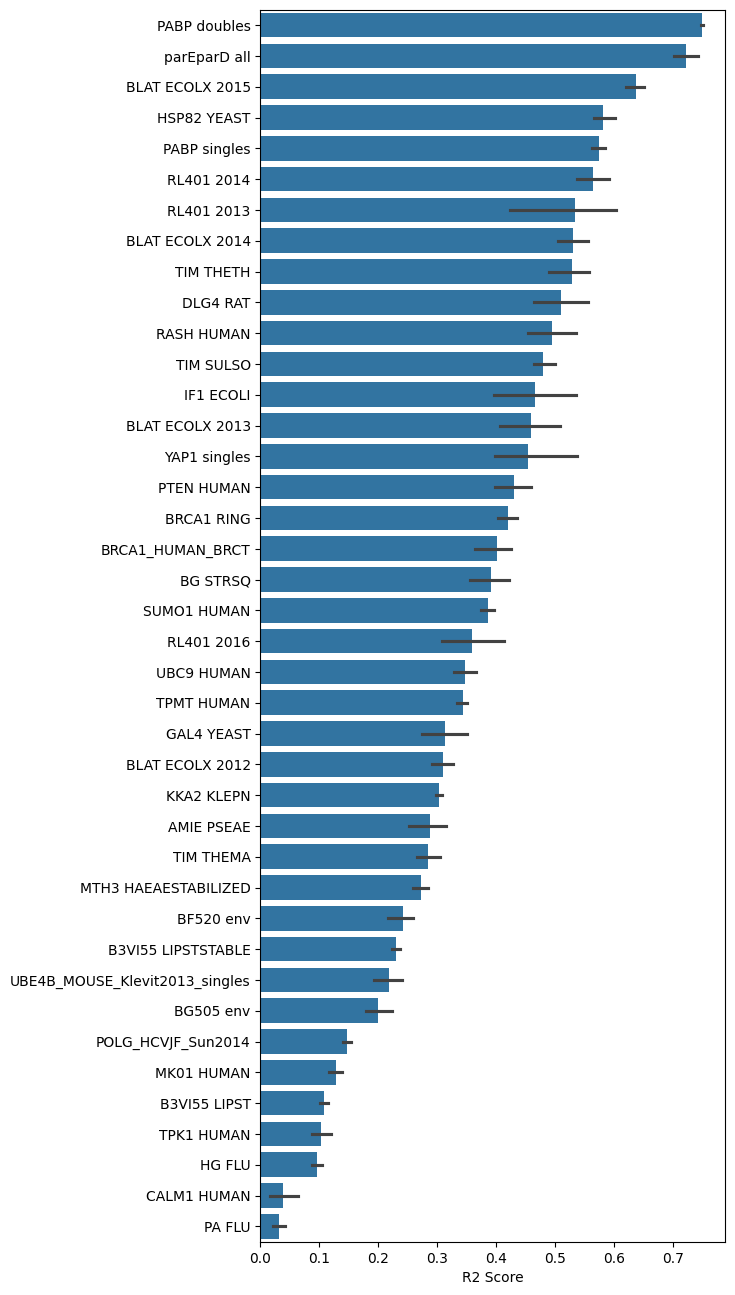

In [19]:
plt.figure(figsize=(6, 16))
sns.barplot(data=data, y='Dataset', x='R2_score_test')
plt.ylabel('R2_score_test')
plt.ylabel('')
plt.xlabel('R2 Score')
#plt.savefig('results/summary_DMS_all_LassoCV_esm2_150M_all_methods.png', dpi=600, bbox_inches='tight')
plt.show()

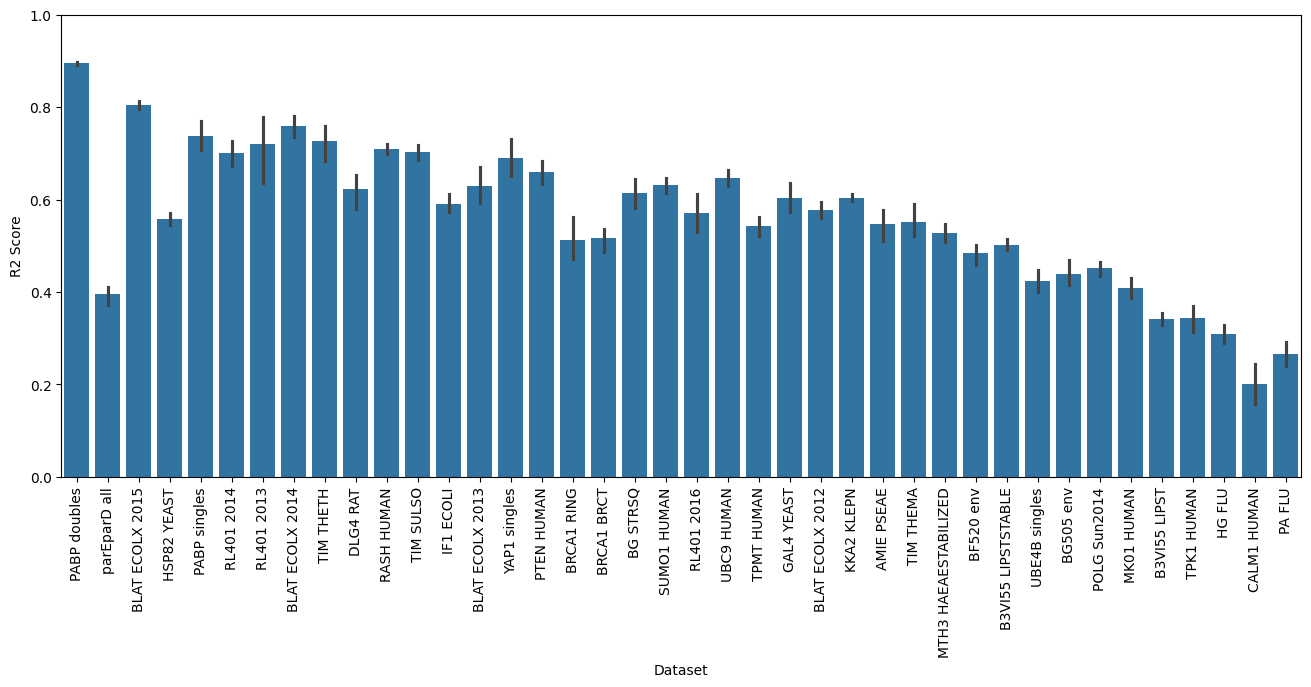

In [21]:

plt.figure(figsize=(16, 6))
sns.barplot(data=data, x='Dataset', y='rho_score_test')
plt.ylabel('R2_score_test')
plt.ylabel('R2 Score')
plt.xlabel('Dataset', )
plt.xticks(rotation=90)
plt.ylim(0, 1)
#plt.savefig('results/summary_DMS_all_LassoCV_esm2_150M_all_methods.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
POL_HV1N5 CA_Ndungu2014 
lactamase [Ranganathan 2015] 
lactamase [Ostermeier 2014] 
TIM Barrell (T. thermophilus) 
lactamase [Palzkill 2012] 
Ubiquitin [Bolon 2013] 
Hras 
Levoglucosan kinase (stabilized) 
Influenza hemagglutinin 
B-glucosidase 
Yeast tRNA (CCU, Arg) 
TIM Barrell (S. solfataricus) 
Aliphatic amidase 
HIV env protein (BG505) 
PABP singles (RRM domain) 
TIM Barrell (T. maritima) 
Kanamycin kinase APH(3)-II
HIV env protein (BF520) 
YAP1 (WW domain 1) 
Mitogen activated protein kinase 1 
SUMO conjugating enzyme UBC9 
PSD95 (PDZ domain) 
Ubiquitin [Bolon 2014] 
lactamase [Tenaillon 2013] 
HSP90 (ATPase domain) 
Ubiquitin [Fraser 2016] 
PTEN_HUMAN_Fowler2018 
GAL4 (DNA binding domain) 
DNA methylase HaeIII 
Translation initiation factor IF1 
Small ubiquitin related modifier 1 
Thiopurine S methyltransferase 
Influenza polymerase PA subunit 
BRCA 1 (BRCT domain) 
UBE4B (Ubox domain) 
Imidazoleglycerol phosphate dehydratase 
BRCA 1 (RING domain) 
Levoglucosan kinase 
Thiamin pyrophosphokinase 1 
Toxin antitoxin complex 
Calmodulin 1

## PISCES

In [26]:
data = pd.read_csv('results/summary_PISCES_lassoCV_esm2_150M_all_methods.csv', index_col=0)
data

,Dataset,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Compression_method
0,Hydrophobicity,Lasso,1,0.099964,0.202466,0.272912,0.069806,0.203464,0.276277,0.279877,0.229911,257,pca2
1,Hydrophobicity,Lasso,2,0.101586,0.201686,0.272770,0.080133,0.205038,0.274207,0.283026,0.230123,310,pca2
2,Hydrophobicity,Lasso,3,0.109902,0.201539,0.272322,0.063741,0.202468,0.273229,0.291055,0.219924,329,pca2
3,Hydrophobicity,Lasso,4,0.108097,0.200683,0.270245,0.052184,0.209064,0.284731,0.283174,0.216039,281,pca2
4,Hydrophobicity,Lasso,5,0.103780,0.201152,0.271577,0.073469,0.206658,0.278800,0.285715,0.225737,310,pca2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,mW kDa,Lasso,1,0.367587,9.350119,13.021213,0.345783,9.524812,13.184062,0.648768,0.631139,206,iDCT1
896,mW kDa,Lasso,2,0.363841,9.438372,13.142839,0.361490,9.183414,12.678727,0.646953,0.644137,210,iDCT1
897,mW kDa,Lasso,3,0.366926,9.336116,13.028997,0.349713,9.497737,13.138918,0.652829,0.625610,210,iDCT1
898,mW kDa,Lasso,4,0.366718,9.338997,12.996344,0.351298,9.439476,13.260403,0.647170,0.644612,212,iDCT1


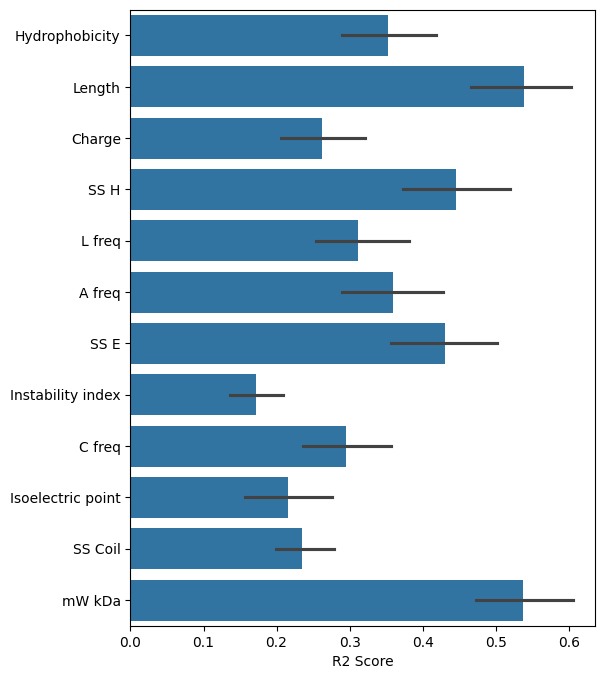

In [27]:
plt.figure(figsize=(6, 8))
sns.barplot(data=data, y='Dataset', x='R2_score_test')
plt.ylabel('R2_score_test')
plt.ylabel('')
plt.xlabel('R2 Score')
#plt.savefig('results/summary_PISCES_all_LassoCV_esm2_150M_mean.png', dpi=600, bbox_inches='tight')
plt.show()

# Multi Model Results on DMS dataset

In [28]:
cols_order = [
    'Dataset', 'Compression_method', 'Model', 'Fold', 'nun_zero_coefs', 
    'R2_score_train', 'MAE_score_train', 'RMSE_score_train', 'rho_score_train', 
    'R2_score_test', 'MAE_score_test', 'RMSE_score_test', 'rho_score_test',
    ]

In [29]:
import re

df = pd.DataFrame()

models = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M_all', 'esm2_650M', 'esm2_3B', 'esm2_15B']
for model in models:
    for file in os.listdir(f'results/lassoCV_DMS/{model}'):
        if file.endswith('.csv'):
            target = re.split(r'_esm.*_', file)[0]
            data = pd.read_csv(f'results/lassoCV_DMS/{model}/{file}', index_col=0)
            data['Model'] = model
            data['Dataset'] = target
            df = pd.concat([df, data])

df= df[cols_order].copy() 
df['Model'].replace('esm2_150M_all', 'esm2_150M', inplace=True)
df['Dataset'] = df['Dataset'].replace(name_map)
df.reset_index(drop=True, inplace=True)
df

,Dataset,Compression_method,Model,Fold,nun_zero_coefs,R2_score_train,MAE_score_train,RMSE_score_train,rho_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_test
0,DLG4 RAT,mean,esm1v_650M,1,107,0.606299,0.167978,0.247419,0.678617,0.517306,0.197666,0.286360,0.612190
1,DLG4 RAT,mean,esm1v_650M,2,142,0.654392,0.157994,0.230258,0.701371,0.586409,0.184295,0.271060,0.668717
2,DLG4 RAT,mean,esm1v_650M,3,66,0.493072,0.196938,0.287347,0.622593,0.445058,0.201264,0.278198,0.532599
3,DLG4 RAT,mean,esm1v_650M,4,75,0.532985,0.183546,0.267771,0.616574,0.430552,0.207193,0.317653,0.611573
4,DLG4 RAT,mean,esm1v_650M,5,106,0.619924,0.174690,0.251558,0.684431,0.514205,0.166521,0.246327,0.655471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,GAL4 YEAST,mean,esm2_15B,1,50,0.405399,3.438468,4.061600,0.718511,0.316305,3.682564,4.432493,0.636308
3971,GAL4 YEAST,mean,esm2_15B,2,102,0.520333,3.016991,3.669269,0.771544,0.466474,3.198986,3.834737,0.736154
3972,GAL4 YEAST,mean,esm2_15B,3,36,0.347786,3.654293,4.283622,0.689833,0.268484,3.826350,4.482737,0.596558
3973,GAL4 YEAST,mean,esm2_15B,4,36,0.325067,3.703526,4.340026,0.678860,0.283312,3.846994,4.510645,0.634199


In [30]:
df.to_csv('results/summary_DMS_all_multi_model_v02.csv')
#df = pd.read_csv('results/summary_DMS_all_multi_model.csv', index_col=0)
#df

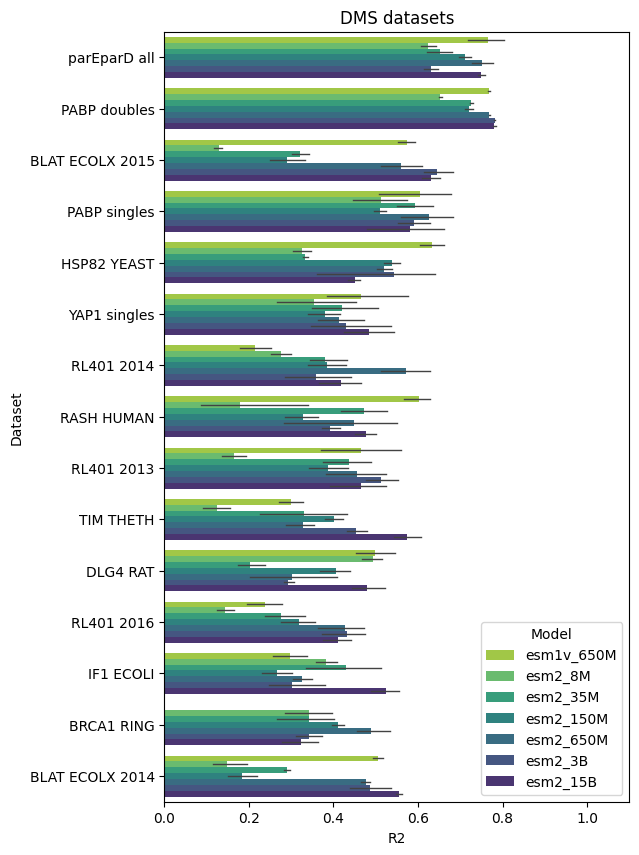

In [228]:
# Datasets order
mean_scores = df.groupby('Dataset')['R2_score_test'].max().sort_values(ascending=False)
sorted_datasets = mean_scores.index
model_order = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']

# plot
plt.figure(figsize=(6, 10))
plt.title('DMS datasets')
sns.barplot(
    data=df, x='R2_score_test', y='Dataset', hue='Model', order=sorted_datasets[:15], 
    hue_order=model_order, palette='viridis_r', err_kws={'linewidth': 1})
plt.xlabel('R2')
plt.xlim(0, 1.1)
plt.ylabel('Dataset')

plt.savefig('results/summary_DMS_top15_multi_model.png', dpi=600, bbox_inches='tight')
plt.show()

In [221]:
sorted_datasets[:10]

Index(['parEparD all', 'PABP doubles', 'BLAT ECOLX 2015', 'PABP singles',
       'HSP82 YEAST', 'YAP1 singles', 'RL401 2014', 'RASH HUMAN', 'RL401 2013',
       'TIM THETH'],
      dtype='object', name='Dataset')

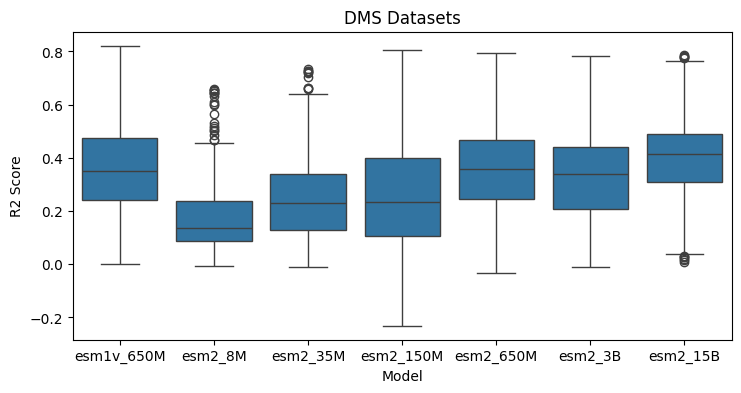

In [ ]:
plt.figure(figsize=(8.5, 4))
plt.title('DMS Datasets')
sns.boxplot(data=df, x='Model', y='R2_score_test', order=model_order)
plt.ylabel('R2 Score')
#plt.savefig('results/summary_DMS_all_multi_model_boxplot.png', dpi=600, bbox_inches='tight')
plt.show()

# Multi Model Results on Pisces dataset

In [41]:
# model = 'esm2_8M'
# repl = 'layer_6_'
# os.makedirs(f"results/lassoCV_PISCES/{model}", exist_ok=True)

# for file in os.listdir('results/lassoCV_PISCES'):
#     if file.endswith('.csv'):
#         if model in file:
#             new_name = file.replace(repl, '')
#             os.rename(os.path.join('results/lassoCV_PISCES', file), os.path.join(f'results/lassoCV_PISCES/{model}', new_name))
        

In [ ]:
# import re

# df = pd.DataFrame()
# models = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']
# for model in models:
#     for file in os.listdir(f'results/lassoCV_PISCES/{model}'):
#         if file.endswith('.csv'):
#             target = re.split(r'_esm.*_', file)[0]
#             data = pd.read_csv(f'results/lassoCV_PISCES/{model}/{file}', index_col=0)
#             data['Model'] = model
#             data['Dataset'] = target
#             df = pd.concat([df, data])

# df= df[cols_order].copy() 
# df.reset_index(drop=True, inplace=True)
# df

In [ ]:
#df.to_csv('results/summary_PISCES_all_multi_model.csv')
df = pd.read_csv('results/summary_PISCES_all_multi_model.csv', index_col=0)
df

,Dataset,Compression_method,Model,Fold,nun_zero_coefs,R2_score_train,MAE_score_train,RMSE_score_train,rho_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_test
0,SS_H,mean,esm1v_650M,1,938,0.927262,0.037465,0.052801,0.956012,0.919686,0.038999,0.054764,0.950769
1,SS_H,mean,esm1v_650M,2,949,0.927665,0.037322,0.052617,0.956157,0.919050,0.039424,0.055136,0.950460
2,SS_H,mean,esm1v_650M,3,960,0.928309,0.037107,0.052094,0.956324,0.916120,0.040435,0.057369,0.951254
3,SS_H,mean,esm1v_650M,4,954,0.927198,0.037327,0.052812,0.956444,0.920738,0.039389,0.054443,0.948609
4,SS_H,mean,esm1v_650M,5,965,0.926950,0.037374,0.052609,0.955439,0.921982,0.039039,0.055232,0.954351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,PCP_length,mean,esm2_15B,1,3608,0.962813,20.400271,28.441053,0.980757,0.943147,25.076990,34.961800,0.968424
416,PCP_length,mean,esm2_15B,2,3521,0.963034,20.546726,28.538302,0.980580,0.940033,25.383983,34.942666,0.969075
417,PCP_length,mean,esm2_15B,3,3450,0.962348,20.484766,28.617726,0.980522,0.940994,25.714836,35.616464,0.969258
418,PCP_length,mean,esm2_15B,4,3591,0.962977,20.340407,28.288456,0.980480,0.941190,25.767728,35.997227,0.969588


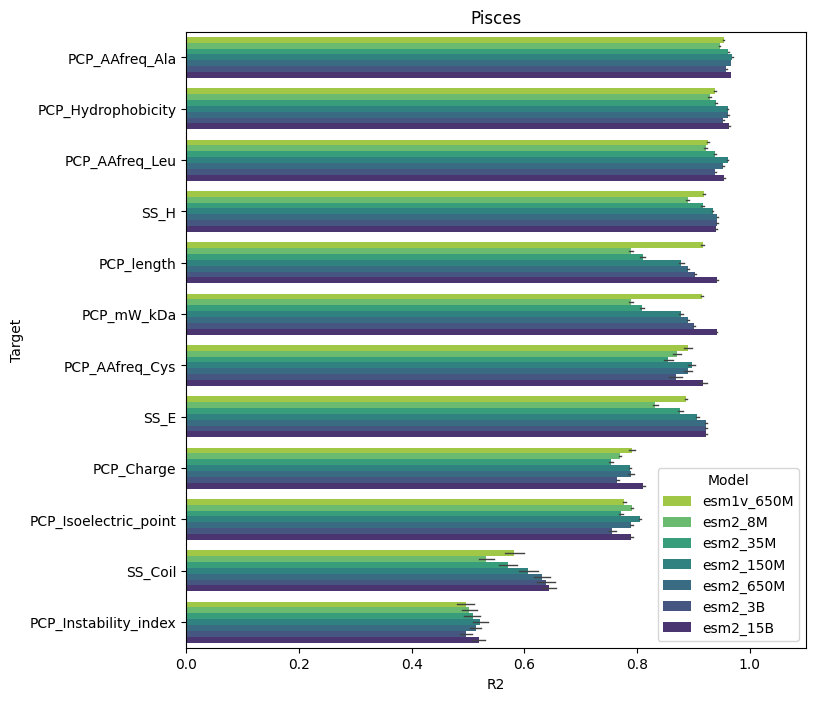

In [ ]:
# Datasets order
mean_scores = df.groupby('Dataset')['R2_score_test'].max().sort_values(ascending=False)
sorted_datasets = mean_scores.index
model_order = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']
# plot
plt.figure(figsize=(8, 8))
plt.title('Pisces')
sns.barplot(
    data=df, x='R2_score_test', y='Dataset', hue='Model', order=sorted_datasets, 
    hue_order=model_order, palette='viridis_r', err_kws={'linewidth': 1})
plt.xlabel('R2')
plt.xlim(0, 1.1)
plt.ylabel('Target')

#plt.savefig('results/summary_results/summary_PISCES_multi_model.png', dpi=600, bbox_inches='tight')
plt.show()

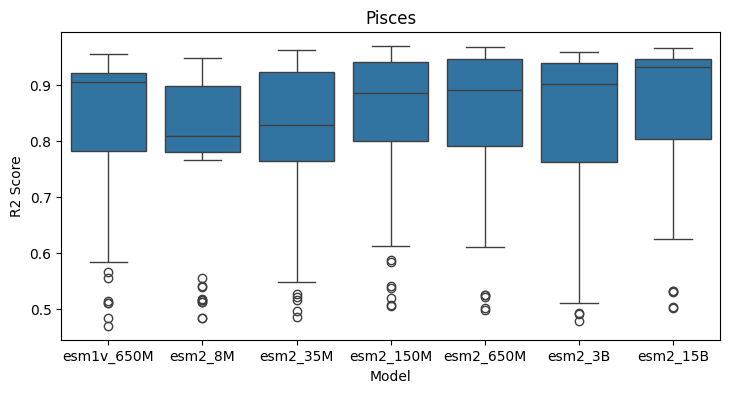

In [ ]:
plt.figure(figsize=(8.5, 4))
plt.title('Pisces')
sns.boxplot(data=df, x='Model', y='R2_score_test', order=model_order)
plt.ylabel('R2 Score')
#plt.savefig('results/summary_PISCES_all_multi_model_boxplot.png', dpi=600, bbox_inches='tight')
plt.show()

# Sample size effect on predictions

## BLAT 2015 - Single Mutations

In [ ]:
# models = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']

# for model in models:
#     base_dir = f'embeddings/DMS_all_compressed/{model}/BLAT_ECOLX_Ranganathan2015_{model}'
#     file = os.listdir(base_dir)
#     embed = pd.read_pickle(os.path.join(base_dir, file[0]))
#     embed_df = pd.DataFrame(embed).T
#     embed_df.reset_index(inplace=True)
#     embed_df.rename(columns={'index': 'ID'}, inplace=True)

#     out_dir= f'embeddings/BLAT_ECOLX_2015_compressed/{model}'
#     if not os.path.exists(out_dir):
#         os.makedirs(out_dir)
#     embed_df.to_pickle(f'{out_dir}/BLAT_ECOLX_2015_{model}_mean_df.pkl')
    

In [81]:
data = pd.DataFrame()
for model in ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']:
    dta = pd.read_csv(f'results/lassoCV_BLAT2015/lassoCV_sampling/BLAT_ECOLX_2015_sampling_{model}_mean.csv', index_col=0)
    dta['Model'] = [model] * dta.shape[0]
    data = pd.concat([data, dta], axis=0)

data.reset_index(drop=True, inplace=True)
data

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Sample_size
0,esm1v_650M,1,6.766376e-01,0.530216,0.631664,-0.540406,1.110645,1.301045,0.835385,0.285714,10,32
1,esm1v_650M,2,9.854538e-01,0.115415,0.141277,-1.335611,1.006419,1.327997,0.973077,0.000000,24,32
2,esm1v_650M,3,7.757467e-01,0.451795,0.543609,0.569934,0.432107,0.647132,0.895385,0.942857,12,32
3,esm1v_650M,4,-2.220446e-15,0.935665,1.040120,-0.000140,1.286014,1.422127,NaN,NaN,0,32
4,esm1v_650M,5,9.936610e-01,0.071509,0.089630,-0.167253,1.041392,1.190601,0.968547,0.485714,29,32
...,...,...,...,...,...,...,...,...,...,...,...,...
205,esm2_15B,1,8.972904e-01,0.285679,0.369508,0.781250,0.420218,0.535626,0.930564,0.869966,1277,4996
206,esm2_15B,2,8.975374e-01,0.286890,0.368341,0.760897,0.432590,0.564164,0.925842,0.877027,1257,4996
207,esm2_15B,3,8.950763e-01,0.290719,0.372785,0.783115,0.410826,0.537534,0.927758,0.883299,1255,4996
208,esm2_15B,4,8.969257e-01,0.287268,0.370096,0.766178,0.433870,0.554368,0.929468,0.864326,1225,4996


In [ ]:
#data.to_csv('results/lassoCV_BLAT_ECOLX_2015/lassoCV_sampling/BLAT_ECOLX_2015_sampling_all_Models_mean.csv')

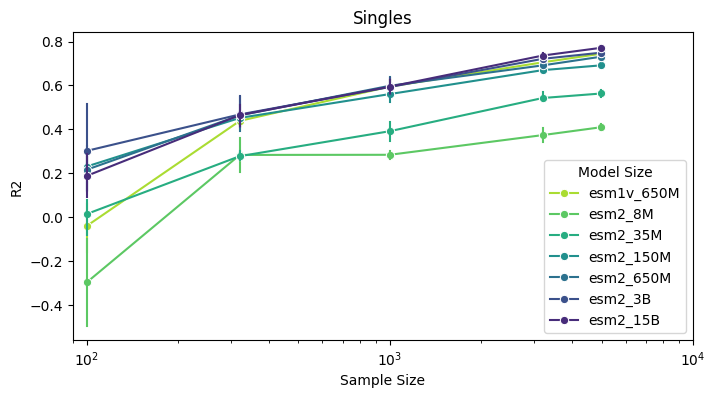

In [ ]:
#plotting the results
data = pd.read_csv('results/lassoCV_BLAT2015/lassoCV_sampling/BLAT_ECOLX_2015_sampling_all_Models_mean.csv')
data = data.query('Sample_size >=100')
plt.figure(figsize=(8, 4)) 
plt.title("Singles")
sns.lineplot(data=data, x='Sample_size', y='R2_score_test', hue='Model', marker='o', err_style="bars", palette='viridis_r')
plt.ylabel('R2')
plt.xlabel('Sample Size')
plt.legend(title='Model Size', loc='lower right')
plt.xlim(90, 10000)
plt.xscale('log')
plt.show()

## PABP - Doubles Mutations

In [ ]:
# models = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']

# for model in models:
#     base_dir = f'embeddings/DMS_all_compressed/{model}/PABP_YEAST_Fields2013_doubles_{model}'
                 
#     file = os.listdir(base_dir)
#     embed = pd.read_pickle(os.path.join(base_dir, file[0]))
#     embed_df = pd.DataFrame(embed).T
#     embed_df.reset_index(inplace=True)
#     embed_df.rename(columns={'index': 'ID'}, inplace=True)

#     out_dir= f'embeddings/PABP_doubles_compressed/{model}'
#     if not os.path.exists(out_dir):
#         os.makedirs(out_dir)
#     embed_df.to_pickle(f'{out_dir}/PABP_Fields2013_doubles_{model}_mean_df.pkl')

In [120]:
data = pd.DataFrame()
for model in ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']:
    dta = pd.read_csv(f"results/lassoCV_PABP_doubles/lassoCV_sampling/PABP_doubles_sampling_{model}_mean.csv", index_col=0)
    dta['Model'] = [model] * dta.shape[0]
    data = pd.concat([data, dta], axis=0)

data.reset_index(drop=True, inplace=True)
data

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Sample_size
0,esm1v_650M,1,-1.554312e-15,0.331271,0.383421,-0.192896,0.307287,0.362964,NaN,NaN,0,32
1,esm1v_650M,2,-4.218847e-15,0.264539,0.320799,-1.661057,0.515200,0.574096,NaN,NaN,0,32
2,esm1v_650M,3,-8.881784e-16,0.333107,0.389631,-1.095426,0.313835,0.337858,NaN,NaN,0,32
3,esm1v_650M,4,1.430052e-01,0.296668,0.345603,-0.181277,0.360618,0.393985,0.652650,0.085714,2,32
4,esm1v_650M,5,3.941832e-01,0.259773,0.308348,-0.278285,0.258291,0.311702,0.796239,-0.371429,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...
275,esm2_15B,1,8.084010e-01,0.131998,0.171212,0.783303,0.140003,0.183057,0.918791,0.910622,1300,36521
276,esm2_15B,2,8.097440e-01,0.131558,0.170627,0.781653,0.139896,0.183682,0.919984,0.908230,1318,36521
277,esm2_15B,3,8.092963e-01,0.132043,0.171073,0.783271,0.139327,0.181919,0.920300,0.904465,1311,36521
278,esm2_15B,4,8.072848e-01,0.132285,0.171955,0.792303,0.138146,0.178152,0.918883,0.912771,1327,36521


In [ ]:
#data.to_csv('results/lassoCV_PABP_doubles/lassoCV_sampling/PABP_doubles_sampling_all_Models_mean.csv')

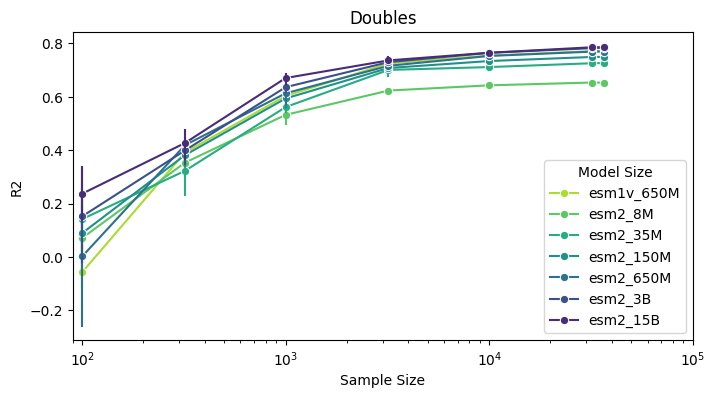

In [122]:
#plotting the results
data = pd.read_csv('results/lassoCV_PABP_doubles/lassoCV_sampling/PABP_doubles_sampling_all_Models_mean.csv')
data = data.query('Sample_size >=100')
plt.figure(figsize=(8, 4)) 
plt.title("Doubles")
sns.lineplot(data=data, x='Sample_size', y='R2_score_test', hue='Model', marker='o', err_style="bars", palette='viridis_r')
plt.ylabel('R2')
plt.xlabel('Sample Size')
plt.legend(title='Model Size', loc='lower right')
plt.xlim(90, 100000)
plt.xscale('log')
plt.show()

## PARE_PARD - Multiple Mutation (1-4)

In [ ]:
# models = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']

# for model in models:
#     base_dir = f'embeddings/DMS_all_compressed/{model}/parEparD_Laub2015_all_{model}'
                 
#     file = os.listdir(base_dir)
#     embed = pd.read_pickle(os.path.join(base_dir, file[0]))
#     embed_df = pd.DataFrame(embed).T
#     embed_df.reset_index(inplace=True)
#     embed_df.rename(columns={'index': 'ID'}, inplace=True)

#     out_dir= f'embeddings/parEparD_all_compressed/{model}'
#     if not os.path.exists(out_dir):
#         os.makedirs(out_dir)
#     embed_df.to_pickle(f'{out_dir}/parEparD_all_{model}_mean_df.pkl')

In [229]:
data = pd.DataFrame()
for model in ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']:
    dta = pd.read_csv(f"results/lassoCV_parEparD_all/lassoCV_sampling/parEparD_all_sampling_{model}_mean.csv", index_col=0)
    dta['Model'] = [model] * dta.shape[0]
    data = pd.concat([data, dta], axis=0)

data.reset_index(drop=True, inplace=True)
data

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Sample_size
0,esm1v_650M,1,0.959429,0.003117,0.003831,0.166018,0.009230,0.013282,0.903077,0.285714,20,32
1,esm1v_650M,2,0.877826,0.005257,0.006429,0.644010,0.009804,0.010238,0.670000,0.785714,16,32
2,esm1v_650M,3,0.887864,0.004394,0.005472,0.487482,0.011721,0.016702,0.857094,0.542857,16,32
3,esm1v_650M,4,0.830003,0.006153,0.007325,0.607888,0.010507,0.012330,0.818803,0.028571,11,32
4,esm1v_650M,5,0.970632,0.002693,0.003247,-1.976670,0.011536,0.017074,0.879658,-0.028571,24,32
...,...,...,...,...,...,...,...,...,...,...,...,...
205,esm2_15B,1,0.893223,0.023250,0.046242,0.887069,0.023974,0.046522,0.419677,0.385661,739,9193
206,esm2_15B,2,0.894644,0.022206,0.045409,0.878636,0.025046,0.050472,0.414943,0.421159,751,9193
207,esm2_15B,3,0.906135,0.022791,0.043822,0.818227,0.025469,0.056300,0.420221,0.368295,748,9193
208,esm2_15B,4,0.896044,0.022783,0.045967,0.877500,0.024803,0.046924,0.415252,0.371036,767,9193


In [ ]:
#data.to_csv('results/lassoCV_parEparD_all/lassoCV_sampling/parEparD_all_sampling_all_Models_mean.csv')

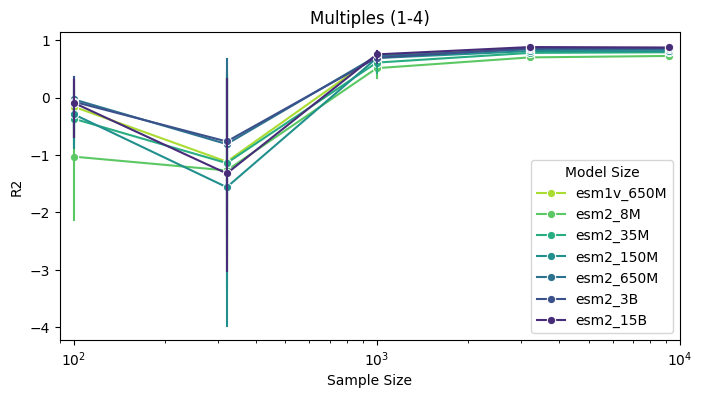

In [230]:
#plotting the results
#data = pd.read_csv('results/lassoCV_parEparD_all/lassoCV_sampling/parEparD_all_sampling_all_Models_mean.csv', index_col=0)

data = data.query('Sample_size >=100')
plt.figure(figsize=(8, 4)) 
plt.title("Multiples (1-4)")
sns.lineplot(data=data, x='Sample_size', y='R2_score_test', hue='Model', marker='o', err_style="bars", palette='viridis_r')
plt.ylabel('R2')
plt.xlabel('Sample Size')
plt.legend(title='Model Size', loc='lower right')
plt.xlim(90, 10000)
plt.xscale('log')
plt.show()

## DMS HIS7 - Multiple mutation (1-28)

In [76]:
data = pd.DataFrame()
for model in ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']:
    dta = pd.read_csv(f'results/lassoCV_HIS7/lassoCV_sampling/HIS7_YEAST_sampling_{model}_mean.csv', index_col=0)
    dta['Model'] = [model] * dta.shape[0]
    data = pd.concat([data, dta], axis=0)

data.reset_index(drop=True, inplace=True)
data

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Sample_size
0,esm1v_650M,1,5.008959e-01,0.262126,0.301604,-0.528276,0.547009,0.573769,0.793982,-0.433461,6,32
1,esm1v_650M,2,4.925876e-08,0.430087,0.449912,-0.045965,0.418240,0.437628,0.308932,-0.478634,1,32
2,esm1v_650M,3,0.000000e+00,0.430749,0.452345,-0.000844,0.383574,0.421980,NaN,NaN,0,32
3,esm1v_650M,4,-1.776357e-15,0.427461,0.444831,-0.204463,0.448542,0.462672,NaN,NaN,0,32
4,esm1v_650M,5,-2.220446e-16,0.430174,0.453914,-0.000397,0.387064,0.414600,NaN,NaN,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
345,esm2_15B,1,7.850863e-01,0.155596,0.208231,0.784361,0.155505,0.208202,0.829845,0.827319,1060,496137
346,esm2_15B,2,7.856202e-01,0.155481,0.207997,0.782953,0.155795,0.208778,0.829999,0.827626,1024,496137
347,esm2_15B,3,7.855805e-01,0.155334,0.207854,0.782883,0.156590,0.209468,0.828984,0.831124,1026,496137
348,esm2_15B,4,7.852693e-01,0.155381,0.207996,0.785261,0.155786,0.208356,0.829419,0.829770,1042,496137


In [ ]:
#data.to_csv('results/lassoCV_HIS7/lassoCV_sampling/HIS7_YEAST_sampling_all_Models_mean.csv')

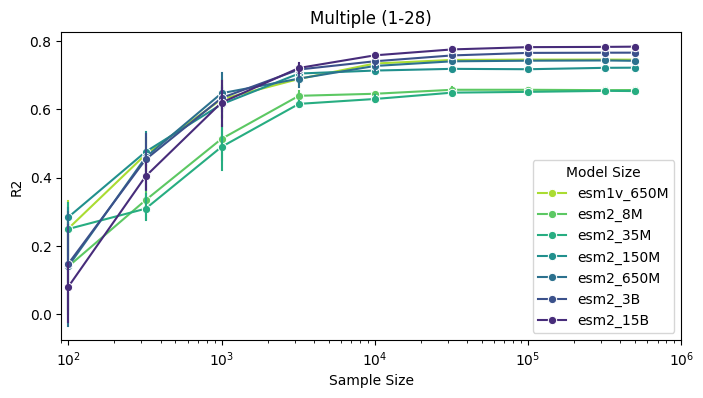

In [ ]:
#plotting the results
data = pd.read_csv('results/lassoCV_HIS7/lassoCV_sampling/HIS7_YEAST_sampling_all_Models_mean.csv')
data = data.query('Sample_size >=100')
plt.figure(figsize=(8, 4)) 
plt.title("Multiple (1-28)")
sns.lineplot(data=data, x='Sample_size', y='R2_score_test', hue='Model', marker='o', err_style="bars", palette='viridis_r')
plt.ylabel('R2')
plt.xlabel('Sample Size')
plt.legend(title='Model Size', loc='lower right')
plt.xlim(90, 1000000)
plt.xscale('log')
plt.show()

## Merging files

In [5]:
results = pd.DataFrame()
datasets = ['BLAT_ECOLX_2015', 'PABP_doubles', 'parEparD_all', 'HIS7_YEAST']
for dms in datasets:
    res = pd.read_csv(f'results/lassoCV_{dms}/lassoCV_sampling/{dms}_sampling_all_Models_mean.csv', index_col=0)
    res['Dataset'] = [dms] * res.shape[0]
    results = pd.concat([results, res])

results.reset_index(drop=True, inplace=True)
results

,Model,Fold,R2_score_train,MAE_score_train,RMSE_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_train,rho_score_test,nun_zero_coefs,Sample_size,Dataset
0,esm1v_650M,1,6.766376e-01,0.530216,0.631664,-0.540406,1.110645,1.301045,0.835385,0.285714,10,32,BLAT_ECOLX_2015
1,esm1v_650M,2,9.854538e-01,0.115415,0.141277,-1.335611,1.006419,1.327997,0.973077,0.000000,24,32,BLAT_ECOLX_2015
2,esm1v_650M,3,7.757467e-01,0.451795,0.543609,0.569934,0.432107,0.647132,0.895385,0.942857,12,32,BLAT_ECOLX_2015
3,esm1v_650M,4,-2.220446e-15,0.935665,1.040120,-0.000140,1.286014,1.422127,NaN,NaN,0,32,BLAT_ECOLX_2015
4,esm1v_650M,5,9.936610e-01,0.071509,0.089630,-0.167253,1.041392,1.190601,0.968547,0.485714,29,32,BLAT_ECOLX_2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,esm2_15B,1,7.850863e-01,0.155596,0.208231,0.784361,0.155505,0.208202,0.829845,0.827319,1060,496137,HIS7_YEAST
1046,esm2_15B,2,7.856202e-01,0.155481,0.207997,0.782953,0.155795,0.208778,0.829999,0.827626,1024,496137,HIS7_YEAST
1047,esm2_15B,3,7.855805e-01,0.155334,0.207854,0.782883,0.156590,0.209468,0.828984,0.831124,1026,496137,HIS7_YEAST
1048,esm2_15B,4,7.852693e-01,0.155381,0.207996,0.785261,0.155786,0.208356,0.829419,0.829770,1042,496137,HIS7_YEAST


In [6]:
#results.to_csv('results/summary_DMS4_sampling.csv')

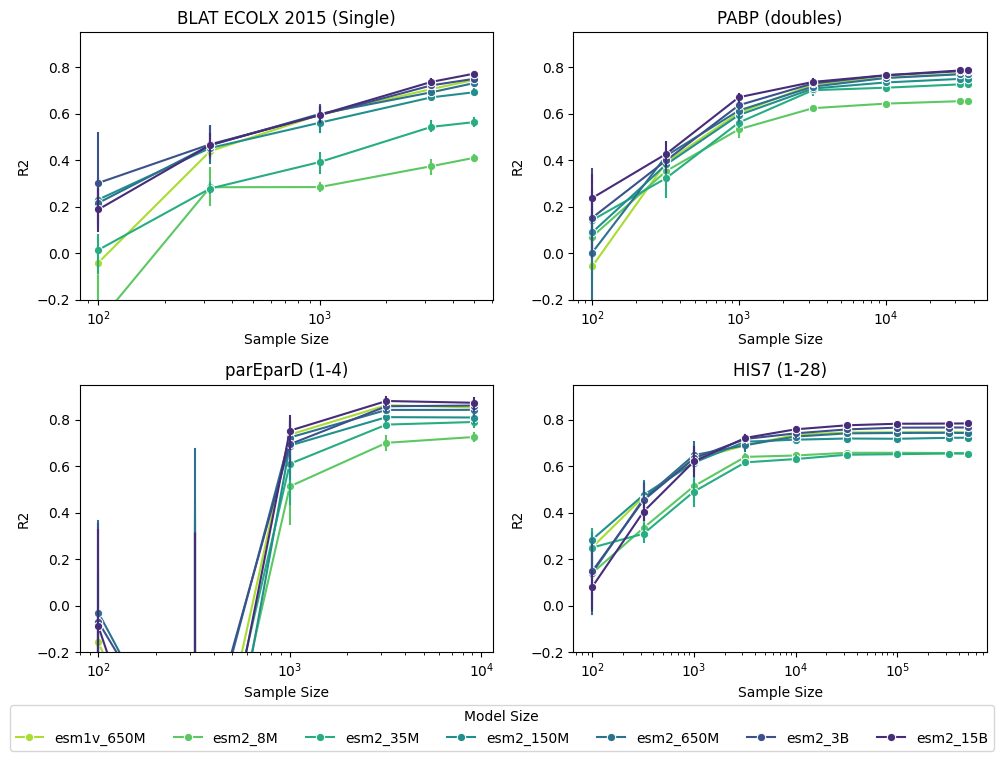

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()

models = ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']
palette = sns.color_palette("viridis_r", len(models))


datasets = ['BLAT_ECOLX_2015', 'PABP_doubles', 'parEparD_all', 'HIS7_YEAST']
for ax, dms in zip(axes, datasets):
    res = pd.read_csv(f'results/lassoCV_{dms}/lassoCV_sampling/{dms}_sampling_all_Models_mean.csv', index_col=0)
    res = res.query('Sample_size >=100')
    sns.lineplot(data=res, x='Sample_size', y='R2_score_test', hue='Model', marker='o', err_style="bars", palette=palette, ax=ax, legend=False)
    
    if dms == 'BLAT_ECOLX_2015':
        title = 'BLAT ECOLX 2015 (Single)'
    elif dms == 'PABP_doubles':
        title = 'PABP (doubles)'
    elif dms == 'parEparD_all':
        title = 'parEparD (1-4)'
    elif dms == 'HIS7_YEAST':
        title = 'HIS7 (1-28)'
    
    ax.set_title(title)
    ax.set_xscale('log')
    ax.set_xlabel('Sample Size')
    ax.set_ylabel('R2')
    ax.set_ylim(-0.2, 0.95)


# Add a single legend for the entire figure
fig.legend(labels=models, loc='lower center', ncol=len(models), title='Model Size',)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
#plt.savefig('results/summary_DMS4_sampling_R2.png', dpi=600, bbox_inches='tight')
plt.show()

## Feature importance

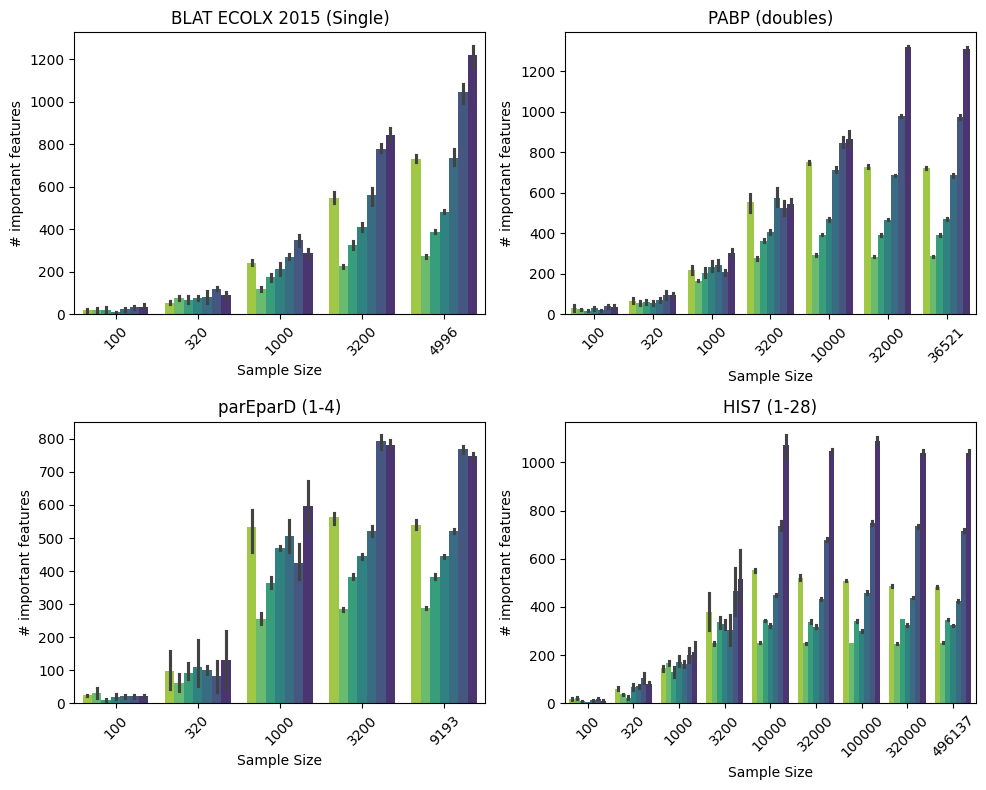

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()

datasets = ['BLAT_ECOLX_2015', 'PABP_doubles', 'parEparD_all', 'HIS7_YEAST']
for ax, dms in zip(axes, datasets):
    res = pd.read_csv(f'results/lassoCV_{dms}/lassoCV_sampling/{dms}_sampling_all_Models_mean.csv', index_col=0)
    res = res.query('Sample_size >=100')
    #sns.lineplot(data=res, x='Sample_size', y='nun_zero_coefs', hue='Model', marker='o', err_style="bars", palette='viridis_r', ax=ax, legend=False)
    sns.barplot(data=res, x='Sample_size', y='nun_zero_coefs', hue='Model',  palette=palette, ax=ax, legend=False)
    
    if dms == 'BLAT_ECOLX_2015':
        title = 'BLAT ECOLX 2015 (Single)'
    elif dms == 'PABP_doubles':
        title = 'PABP (doubles)'
    elif dms == 'parEparD_all':
        title = 'parEparD (1-4)'
    elif dms == 'HIS7_YEAST':
        title = 'HIS7 (1-28)'
    
    ax.set_title(title)
    ax.set_xlabel('Sample Size')
    ax.set_ylabel('# important features')
    ax.tick_params(axis='x', rotation=45)
 
# Add a single legend for the entire figure
#fig.legend(labels=models, loc='lower center', ncol=len(models), title='Model Size',)

plt.tight_layout()
#plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('results/summary_DMS4_sampling_important_features.png', dpi=600, bbox_inches='tight')
plt.show()

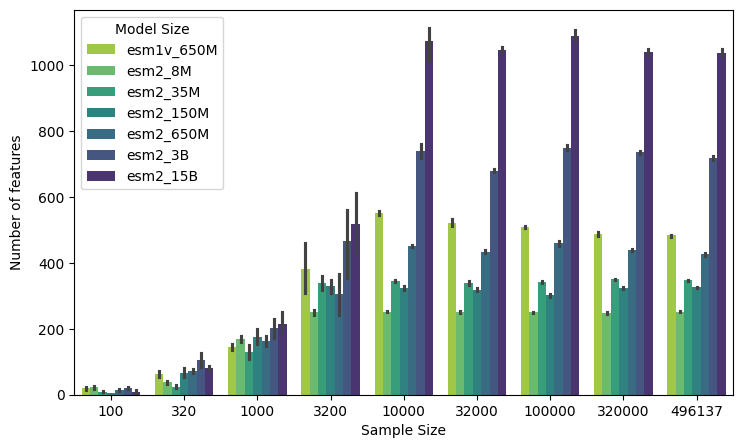

In [80]:
#plotting the results
plt.figure(figsize=(8.5, 5)) 
sns.barplot(data=data, x='Sample_size', y='nun_zero_coefs', hue='Model',  palette='viridis_r')
plt.ylabel('Number of features')
plt.xlabel('Sample Size')
plt.legend(title='Model Size', loc='upper left')
#plt.xscale('log')
#plt.savefig('results/lassoCV_HIS7/HIS7_YEAST_Kondrashov2017_sampling_esm2_all_num_feature.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
#data.to_csv('results/lassoCV_DMS/lassoCV_sampling/HIS7_YEAST_Kondrashov2017_sampling_esm2_all.csv')

# Sample size contribuition

In [27]:
df_meta = pd.read_excel('data/Datasets_metadata.xlsx', sheet_name='data')
df_meta['Dataset_name'].replace('_', ' ', regex=True, inplace=True)
df_meta['Dataset_name'] = df_meta['Dataset_name'].str.rstrip()
group_name = dict(zip(df_meta['Dataset_name'], df_meta['Measurement']))


In [ ]:
dict_length = {}
dir = 'embeddings/DMS/'
for file in os.listdir(dir):
    if file.endswith('_esm2_150M'):
        file_name = file.split('_esm2_150M')[0]
        l = len(os.listdir(f'{dir}/{file}'))
        dict_length[name_map[file_name]] = l

df = pd.DataFrame.from_dict(dict_length, orient='index').sort_values(0, ascending=True).reset_index()
df.rename(columns={'index': 'Dataset', 0: 'length'}, inplace=True)

df

,Dataset,length
0,YAP1 singles,362
1,BRCA1 RING,660
2,UBE4B singles,899
3,BLAT ECOLX 2013,989
4,PABP singles,1187
5,GAL4 YEAST,1195
6,RL401 2013,1269
7,RL401 2016,1324
8,RL401 2014,1435
9,IF1 ECOLI,1439


In [34]:
res = pd.read_csv(f'results/summary_DMS_all_multi_model_v02.csv', index_col=0)
res['dataset_size'] = res.apply(lambda row: dict_length[row['Dataset']], axis=1)
res['group'] = res.apply(lambda row: group_name[row['Dataset']], axis=1)
res

,Dataset,Compression_method,Model,Fold,nun_zero_coefs,R2_score_train,MAE_score_train,RMSE_score_train,rho_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_test,dataset_size,group
0,DLG4 RAT,mean,esm1v_650M,1,107,0.606299,0.167978,0.247419,0.678617,0.517306,0.197666,0.286360,0.612190,1659,Peptide binding
1,DLG4 RAT,mean,esm1v_650M,2,142,0.654392,0.157994,0.230258,0.701371,0.586409,0.184295,0.271060,0.668717,1659,Peptide binding
2,DLG4 RAT,mean,esm1v_650M,3,66,0.493072,0.196938,0.287347,0.622593,0.445058,0.201264,0.278198,0.532599,1659,Peptide binding
3,DLG4 RAT,mean,esm1v_650M,4,75,0.532985,0.183546,0.267771,0.616574,0.430552,0.207193,0.317653,0.611573,1659,Peptide binding
4,DLG4 RAT,mean,esm1v_650M,5,106,0.619924,0.174690,0.251558,0.684431,0.514205,0.166521,0.246327,0.655471,1659,Peptide binding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,GAL4 YEAST,mean,esm2_15B,1,50,0.405399,3.438468,4.061600,0.718511,0.316305,3.682564,4.432493,0.636308,1195,Growth
3971,GAL4 YEAST,mean,esm2_15B,2,102,0.520333,3.016991,3.669269,0.771544,0.466474,3.198986,3.834737,0.736154,1195,Growth
3972,GAL4 YEAST,mean,esm2_15B,3,36,0.347786,3.654293,4.283622,0.689833,0.268484,3.826350,4.482737,0.596558,1195,Growth
3973,GAL4 YEAST,mean,esm2_15B,4,36,0.325067,3.703526,4.340026,0.678860,0.283312,3.846994,4.510645,0.634199,1195,Growth


# Sequence length

In [35]:
from Bio import SeqIO

In [36]:
seq_length = {}

for file in os.listdir('data/DMS_mut_sequences'):
    fasta = SeqIO.parse(f'data/DMS_mut_sequences/{file}', 'fasta')
    dataset = file.split('_muts')[0]
    seq = str(list(fasta)[0].seq)
    seq_length[name_map[dataset]] = len(seq)
    
seq_length

{'BG505 env': 860,
 'MTH3 HAEAESTABILIZED': 331,
 'SUMO1 HUMAN': 101,
 'TPMT HUMAN': 245,
 'TPK1 HUMAN': 243,
 'IF1 ECOLI': 72,
 'PA FLU': 716,
 'AMIE PSEAE': 346,
 'RL401 2014': 128,
 'B3VI55 LIPST': 439,
 'TIM THETH': 254,
 'RL401 2013': 128,
 'DLG4 RAT': 724,
 'TIM SULSO': 248,
 'UBE4B singles': 1173,
 'KKA2 KLEPN': 264,
 'PTEN HUMAN': 403,
 'BF520 env': 852,
 'RL401 2016': 128,
 'MK01 HUMAN': 360,
 'BLAT ECOLX 2012': 286,
 'BRCA1 RING': 1863,
 'BLAT ECOLX 2013': 286,
 'YAP1 singles': 504,
 'BLAT ECOLX 2014': 286,
 'GAL4 YEAST': 881,
 'PABP singles': 577,
 'B3VI55 LIPSTSTABLE': 447,
 'CALM1 HUMAN': 149,
 'PABP doubles': 577,
 'HG FLU': 565,
 'POLG Sun2014': 3033,
 'BG STRSQ': 501,
 'BLAT ECOLX 2015': 286,
 'HSP82 YEAST': 709,
 'TIM THEMA': 252,
 'RASH HUMAN': 189,
 'UBC9 HUMAN': 158,
 'parEparD all': 93,
 'BRCA1 BRCT': 1863}

In [37]:
res['prot_length'] = res.apply(lambda row: seq_length[row['Dataset']], axis=1)
res

,Dataset,Compression_method,Model,Fold,nun_zero_coefs,R2_score_train,MAE_score_train,RMSE_score_train,rho_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_test,dataset_size,group,prot_length
0,DLG4 RAT,mean,esm1v_650M,1,107,0.606299,0.167978,0.247419,0.678617,0.517306,0.197666,0.286360,0.612190,1659,Peptide binding,724
1,DLG4 RAT,mean,esm1v_650M,2,142,0.654392,0.157994,0.230258,0.701371,0.586409,0.184295,0.271060,0.668717,1659,Peptide binding,724
2,DLG4 RAT,mean,esm1v_650M,3,66,0.493072,0.196938,0.287347,0.622593,0.445058,0.201264,0.278198,0.532599,1659,Peptide binding,724
3,DLG4 RAT,mean,esm1v_650M,4,75,0.532985,0.183546,0.267771,0.616574,0.430552,0.207193,0.317653,0.611573,1659,Peptide binding,724
4,DLG4 RAT,mean,esm1v_650M,5,106,0.619924,0.174690,0.251558,0.684431,0.514205,0.166521,0.246327,0.655471,1659,Peptide binding,724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,GAL4 YEAST,mean,esm2_15B,1,50,0.405399,3.438468,4.061600,0.718511,0.316305,3.682564,4.432493,0.636308,1195,Growth,881
3971,GAL4 YEAST,mean,esm2_15B,2,102,0.520333,3.016991,3.669269,0.771544,0.466474,3.198986,3.834737,0.736154,1195,Growth,881
3972,GAL4 YEAST,mean,esm2_15B,3,36,0.347786,3.654293,4.283622,0.689833,0.268484,3.826350,4.482737,0.596558,1195,Growth,881
3973,GAL4 YEAST,mean,esm2_15B,4,36,0.325067,3.703526,4.340026,0.678860,0.283312,3.846994,4.510645,0.634199,1195,Growth,881


In [ ]:
#res.to_csv('results/summary_DMS_all_multi_model_v03.csv')

## Dataset size

In [ ]:
res = pd.read_csv('results/summary_DMS_all_multi_model_v03.csv', index_col=0)

res['group'] = res['group'].str.rstrip()


res['group'].replace('Yeast growth', 'Growth', inplace=True) 
res['group'].replace('E1 reactivity', 'Other', inplace=True) 
res['group'].replace('MIC', 'Other', inplace=True) 
res['group'].replace('Ligase activity', 'Other', inplace=True) 

res['group'].unique()

array(['Peptide binding', 'Growth', 'Other', 'Protein stability',
       'Viral replication', 'Enzyme function'], dtype=object)

In [ ]:
#res.to_csv('results/summary_DMS_all_multi_model.csv')

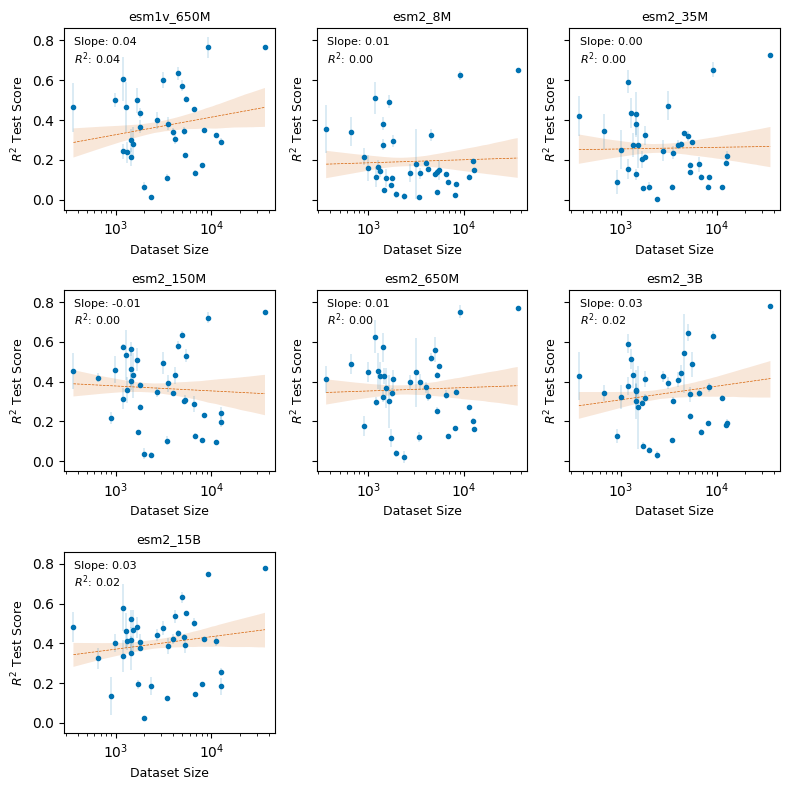

In [150]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression



fig, axes = plt.subplots(3, 3, figsize=(8, 8), sharey=True)
axes = axes.flatten()  # Flatten the 2x2 array of axes for easier iteration

for ax, ms in zip(axes, ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']):
    data = res.query(f"Model == '{ms}' & Compression_method == 'mean'")

    X = np.log(data['dataset_size'].values).reshape(-1, 1)  # Log-transform the x-values, and reshape so X is 2D
    y = data['R2_score_test'].values

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficients
    slope = model.coef_[0]
    intercept = model.intercept_

    # Predict and calculate R²
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    ################ Annotation ################
    # Get mean and standard deviation for each dataset size
    grouped_data = data.groupby('dataset_size')['R2_score_test'].agg(['mean', 'std']).reset_index()
    # Add error bars
    ax.errorbar(grouped_data['dataset_size'], grouped_data['mean'], yerr=grouped_data['std'], fmt='o', markersize=3, color='#0072B2', ecolor='#0072B2', elinewidth=0.2, capsize=0)
    # Regression line
    sns.regplot(data=data, x='dataset_size', y='R2_score_test', scatter=False, logx=True, color='#D55E00', line_kws={'linestyle': '--', 'linewidth': 0.5}, ax=ax)

    # Annotate
    ax.text(0.05, 0.95, f'Slope: {slope:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    ax.text(0.05, 0.88, f'$R^2$: {r2:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    ax.set_title(f'{ms}', fontsize=9)
    ax.set_xlabel('Dataset Size', fontsize=9)
    ax.set_ylabel(r'$R^2$ Test Score', fontsize=9)
    #ax.set_xlim(1000, 45000)
    ax.set_xscale('log')

# Turn off the remaining axes
for ax in axes[7:]:
    ax.axis('off')

plt.tight_layout()
#plt.savefig('results/summary_DMS_all_LassoCV_r2_sloop_all_models.png', dpi=600, bbox_inches='tight')
plt.show()

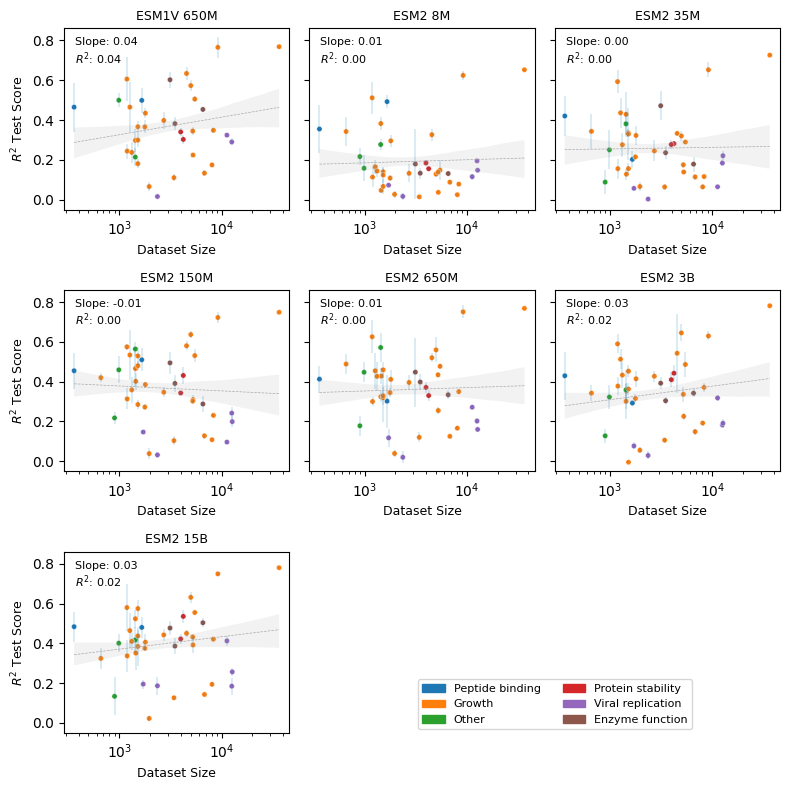

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches


fig, axes = plt.subplots(3, 3, figsize=(8, 8), sharey=True)
axes = axes.flatten() 

#palette = sns.color_palette("muted", 11)  # or use a custom palette
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78']

group_labels = res['group'].unique()  # Get unique group labels
handles = [mpatches.Patch(color=palette[i], label=group_labels[i]) for i in range(len(group_labels))]


for ax, ms in zip(axes, ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']):
    data = res.query(f"Model == '{ms}' & Compression_method == 'mean'")
    grouped_data = data.groupby(['Dataset', 'dataset_size', 'group'])['R2_score_test'].agg(['mean', 'std']).reset_index()
    
    # Map colors to the 'group' column
    color_map = {label: palette[i] for i, label in enumerate(group_labels)}
    scatter = sns.scatterplot(data=grouped_data, x='dataset_size', y='mean', hue='group', palette=color_map,legend=False, s=15, ax=ax)
    ax.errorbar(grouped_data['dataset_size'], grouped_data['mean'], yerr=grouped_data['std'], fmt='o', markersize=0, color='#0072B2', ecolor='#0072B2', elinewidth=0.2, capsize=0)

    # Fit a linear regression model
    X = np.log(data['dataset_size'].values).reshape(-1, 1)  
    y = data['R2_score_test'].values
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Annotate
    ax.text(0.05, 0.95, f'Slope: {slope:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    ax.text(0.05, 0.88, f'$R^2$: {r2:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    
    
    #sns.regplot(data=data, x='dataset_size', y='R2_score_test', scatter=False, logx=True,  color='#D55E00', line_kws={'linestyle': '--', 'linewidth': 0.5}, ax=ax)
    sns.regplot(data=data, x='dataset_size', y='R2_score_test', scatter=False, logx=True,  color='#A9A9A9', line_kws={'linestyle': '--', 'linewidth': 0.5}, ax=ax)

    t = ms.replace('_', ' ').upper()
    ax.set_title(f'{t}', fontsize=9)
    ax.set_xlabel('Dataset Size', fontsize=9)
    ax.set_ylabel(r'$R^2$ Test Score', fontsize=9)
    ax.set_xscale('log')
    for ax in axes[7:]:
        ax.axis('off')

fig.legend(handles, group_labels, loc='lower center', ncol=2, fontsize=8, bbox_to_anchor=(0.7, 0.075), frameon=True)

plt.tight_layout()

#fig.savefig('results/summary_DMS_all_r2_sloop_all_models_dataset_size.png', dpi=600, bbox_inches='tight')
plt.show()

## Protein Length

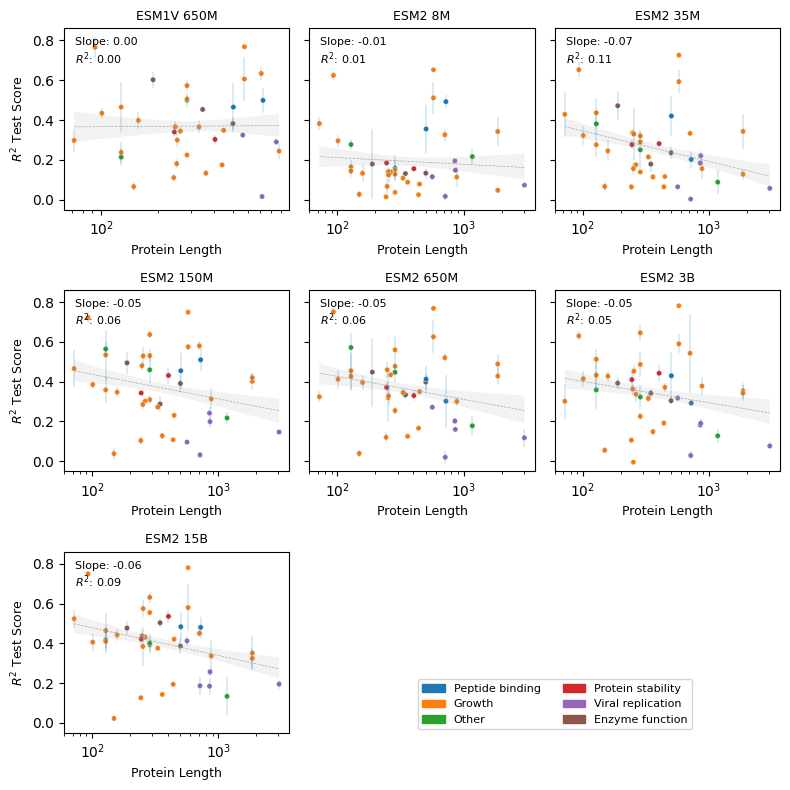

In [15]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches


fig, axes = plt.subplots(3, 3, figsize=(8, 8), sharey=True)
axes = axes.flatten() 

#palette = sns.color_palette("muted", 11)  # or use a custom palette
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78']

group_labels = res['group'].unique()  # Get unique group labels
handles = [mpatches.Patch(color=palette[i], label=group_labels[i]) for i in range(len(group_labels))]


for ax, ms in zip(axes, ['esm1v_650M', 'esm2_8M', 'esm2_35M', 'esm2_150M', 'esm2_650M', 'esm2_3B', 'esm2_15B']):
    data = res.query(f"Model == '{ms}' & Compression_method == 'mean'")
    grouped_data = data.groupby(['Dataset', 'prot_length', 'group'])['R2_score_test'].agg(['mean', 'std']).reset_index()
    
    # Map colors to the 'group' column
    color_map = {label: palette[i] for i, label in enumerate(group_labels)}
    scatter = sns.scatterplot(data=grouped_data, x='prot_length', y='mean', hue='group', palette=color_map,legend=False, s=15, ax=ax)
    ax.errorbar(grouped_data['prot_length'], grouped_data['mean'], yerr=grouped_data['std'], fmt='o', markersize=0, color='#0072B2', ecolor='#0072B2', elinewidth=0.2, capsize=0)

    # Fit a linear regression model
    X = np.log(data['prot_length'].values).reshape(-1, 1)  
    y = data['R2_score_test'].values
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Annotate
    ax.text(0.05, 0.95, f'Slope: {slope:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    ax.text(0.05, 0.88, f'$R^2$: {r2:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    
    
    sns.regplot(data=data, x='prot_length', y='R2_score_test', scatter=False, logx=True,  color='#A9A9A9', line_kws={'linestyle': '--', 'linewidth': 0.5}, ax=ax)

    t = ms.replace('_', ' ').upper()
    ax.set_title(f'{t}', fontsize=9)
    ax.set_xlabel('Protein Length', fontsize=9)
    ax.set_ylabel(r'$R^2$ Test Score', fontsize=9)
    ax.set_xscale('log')
    for ax in axes[7:]:
        ax.axis('off')

fig.legend(handles, group_labels, loc='lower center', ncol=2, fontsize=8, bbox_to_anchor=(0.7, 0.075), frameon=True)

plt.tight_layout()

#fig.savefig('results/summary_DMS_all_r2_sloop_all_models_prot_length.png', dpi=600, bbox_inches='tight')
plt.show()

## Sample size and protein length effect on ESM2 15B

In [63]:
res = pd.read_csv('results/summary_DMS_all_multi_model.csv', index_col=0)
res = res.query('Model == "esm2_15B"')
res

,Dataset,Compression_method,Model,Fold,nun_zero_coefs,R2_score_train,MAE_score_train,RMSE_score_train,rho_score_train,R2_score_test,MAE_score_test,RMSE_score_test,rho_score_test,dataset_size,group,prot_length
3775,PABP singles,mean,esm2_15B,1,188,0.758906,0.137595,0.179900,0.863633,0.644683,0.165807,0.211506,0.783970,1187,Growth,577
3776,PABP singles,mean,esm2_15B,2,146,0.707289,0.156349,0.193663,0.821159,0.516319,0.196034,0.269529,0.767841,1187,Growth,577
3777,PABP singles,mean,esm2_15B,3,50,0.442254,0.218238,0.269074,0.715264,0.404308,0.242571,0.289712,0.706477,1187,Growth,577
3778,PABP singles,mean,esm2_15B,4,255,0.806083,0.120909,0.162396,0.887660,0.661824,0.159717,0.200229,0.770460,1187,Growth,577
3779,PABP singles,mean,esm2_15B,5,245,0.801850,0.123244,0.163400,0.883241,0.672639,0.154832,0.200951,0.764168,1187,Growth,577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,GAL4 YEAST,mean,esm2_15B,1,50,0.405399,3.438468,4.061600,0.718511,0.316305,3.682564,4.432493,0.636308,1195,Growth,881
3971,GAL4 YEAST,mean,esm2_15B,2,102,0.520333,3.016991,3.669269,0.771544,0.466474,3.198986,3.834737,0.736154,1195,Growth,881
3972,GAL4 YEAST,mean,esm2_15B,3,36,0.347786,3.654293,4.283622,0.689833,0.268484,3.826350,4.482737,0.596558,1195,Growth,881
3973,GAL4 YEAST,mean,esm2_15B,4,36,0.325067,3.703526,4.340026,0.678860,0.283312,3.846994,4.510645,0.634199,1195,Growth,881


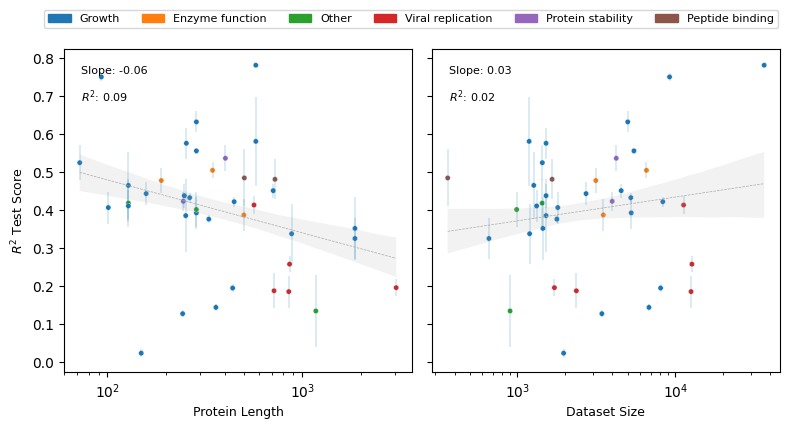

In [64]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches


fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
axes = axes.flatten() 

palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78']

group_labels = res['group'].unique()  # Get unique group labels
handles = [mpatches.Patch(color=palette[i], label=group_labels[i]) for i in range(len(group_labels))]


for ax, grp in zip(axes, ['prot_length', 'dataset_size']):
    data = res.query(f"Model == 'esm2_15B' & Compression_method == 'mean'")
    grouped_data = data.groupby(['Dataset', grp, 'group'])['R2_score_test'].agg(['mean', 'std']).reset_index()
    
    # Map colors to the 'group' column
    color_map = {label: palette[i] for i, label in enumerate(group_labels)}
    scatter = sns.scatterplot(data=grouped_data, x=grp, y='mean', hue='group', palette=color_map,legend=False, s=15, ax=ax)
    ax.errorbar(grouped_data[grp], grouped_data['mean'], yerr=grouped_data['std'], fmt='o', markersize=0, color='#0072B2', ecolor='#0072B2', elinewidth=0.2, capsize=0)

    # Fit a linear regression model
    X = np.log(data[grp].values).reshape(-1, 1)  
    y = data['R2_score_test'].values
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Annotate
    ax.text(0.05, 0.95, f'Slope: {slope:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    ax.text(0.05, 0.88, f'$R^2$: {r2:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
    
    
    sns.regplot(data=data, x=grp, y='R2_score_test', scatter=False, logx=True,  color='#A9A9A9', line_kws={'linestyle': '--', 'linewidth': 0.5}, ax=ax)

    t = ms.replace('_', ' ').upper()
    #ax.set_title(f'{t}', fontsize=9)
    l = 'Protein Length' if grp == 'prot_length' else 'Dataset Size'
    ax.set_xlabel(f'{l}', fontsize=9)
    ax.set_ylabel(r'$R^2$ Test Score', fontsize=9)
    ax.set_xscale('log')
    for ax in axes[7:]:
        ax.axis('off')

fig.legend(handles, group_labels, loc='lower center', ncol=7, fontsize=8, bbox_to_anchor=(0.52, 1.0), frameon=True)

plt.tight_layout()

#fig.savefig('results/summary_DMS_all_r2_sloop_all_models_data_effect.png', dpi=600, bbox_inches='tight')
plt.show()